In [55]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Source
dataset_source = "Custom dataset from local SQLite database"
dataset_link = "https://www.dropbox.com/scl/fo/y1oi3efi157ljjkz7m3sj/API62T6BzDOQyI96NLaIRQQ?rlkey=okvow1oa13alowespgpgqtlmk&e=1&dl=0"  
dataset_format = "SQLite"


In [56]:
db_path = '/content/database.sqlite'

conn = sqlite3.connect(db_path)

query = "SELECT * FROM Player_Attributes"
df = pd.read_sql_query(query, conn)

conn.close()

df.head(20)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [57]:
df.shape

(183978, 42)

In [58]:
df.dtypes

,0
id,int64
player_fifa_api_id,int64
player_api_id,int64
date,object
overall_rating,float64
potential,float64
preferred_foot,object
attacking_work_rate,object
defensive_work_rate,object
crossing,float64


In [103]:
missing_values = df.isnull().sum()
print(f"Missing values per feature:\n{missing_values}")


Missing values per feature:
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking             

In [104]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Duplicate rows:\n{duplicates}")


Duplicate rows:
Empty DataFrame
Columns: [id, player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]
Index: []

[0 rows x 42 columns]


In [60]:
len(df['player_fifa_api_id'].unique())

11062

In [61]:
# Categorical columns
categorical_data = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# Numerical columns
numerical_data = ['potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling',
                  'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
                  'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
                  'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Target column
target_data = ['overall_rating']


In [107]:
# Numerical statistics
numerical_stats = df.describe()
print(f"Numerical features statistics:\n{numerical_stats}")


Numerical features statistics:
                  id  player_fifa_api_id  player_api_id  overall_rating  \
count  183142.000000       183142.000000  183142.000000   183142.000000   
mean    91978.031265       165826.723040  136294.314139       68.600015   
std     53116.611471        53782.559432  137080.717171        7.041139   
min         1.000000            2.000000    2625.000000       33.000000   
25%     45985.250000       155885.000000   34952.000000       64.000000   
50%     91958.500000       183527.000000   78411.000000       69.000000   
75%    137972.750000       199912.000000  191616.000000       73.000000   
max    183978.000000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  183142.000000  183142.000000  183142.000000     183142.000000   
mean       73.460353      55.086883      49.921078         57.266023   
std         6.592271      17.242135      19.038705         16.488905   
min  

In [109]:
# Categorical statistics
categorical_stats = df['overall_rating'].value_counts()
print(f"Categorical features count:\n{categorical_stats}")


Categorical features count:
overall_rating
68.0    10492
69.0    10281
67.0    10198
66.0    10112
70.0    10028
        ...  
38.0        8
35.0        5
37.0        3
36.0        3
33.0        2
Name: count, Length: 61, dtype: int64


/tmp/ipython-input-1835860298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_foot', data=df, palette="Set2")


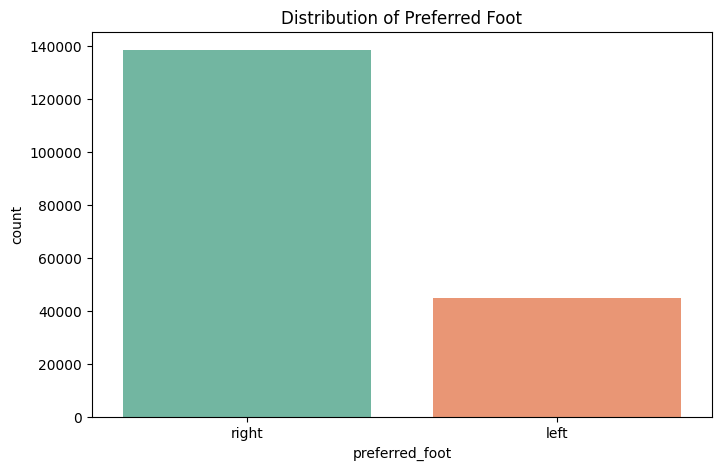

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution for the 'preferred_foot' feature
plt.figure(figsize=(8, 5))
sns.countplot(x='preferred_foot', data=df, palette="Set2")
plt.title('Distribution of Preferred Foot')
plt.show()


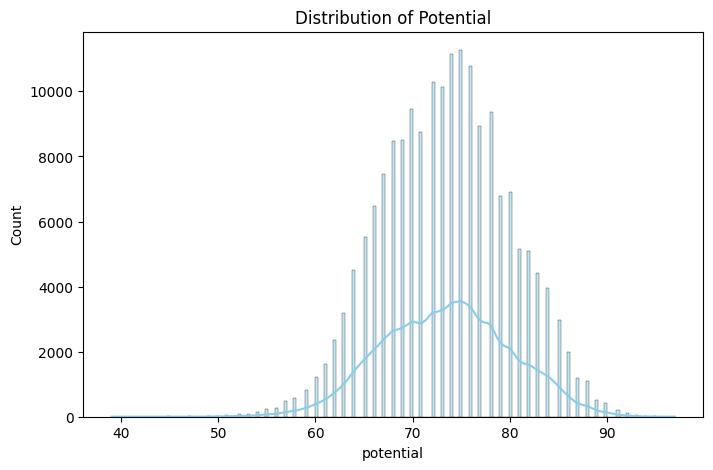

In [122]:
# Visualize the distribution for the 'potential' feature
plt.figure(figsize=(8, 5))
sns.histplot(df['potential'], kde=True, color='skyblue')
plt.title('Distribution of Potential')
plt.show()


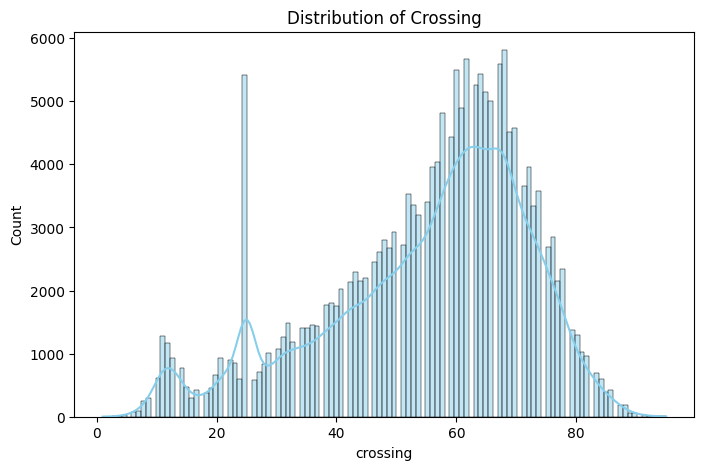

In [123]:
# Visualize the distribution for the 'crossing' feature
plt.figure(figsize=(8, 5))
sns.histplot(df['crossing'], kde=True, color='skyblue')
plt.title('Distribution of Crossing')
plt.show()


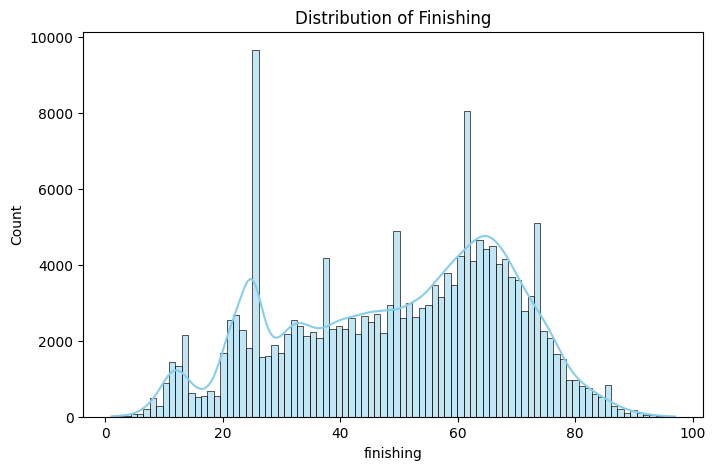

In [124]:
# Visualize the distribution for the 'finishing' feature
plt.figure(figsize=(8, 5))
sns.histplot(df['finishing'], kde=True, color='skyblue')
plt.title('Distribution of Finishing')
plt.show()


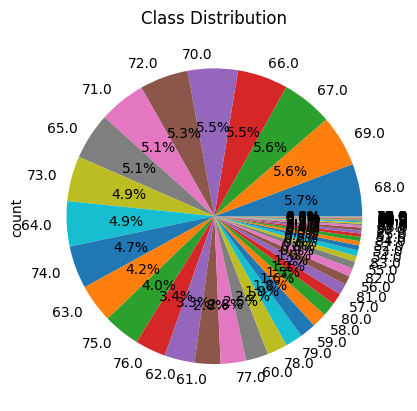

In [110]:
df['overall_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


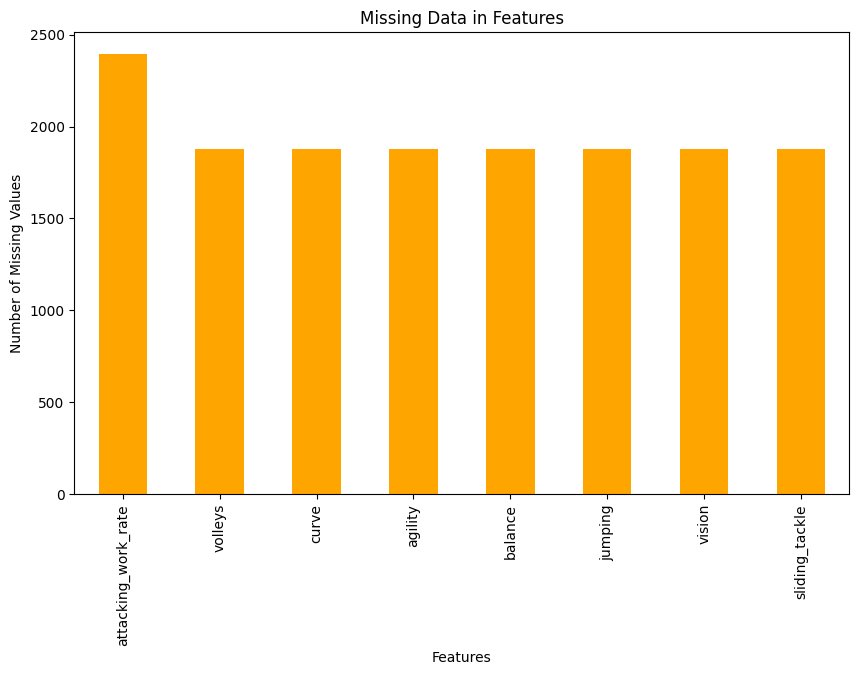

In [127]:
# Visualizing missing data with a bar plot
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Only show columns with missing data

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title('Missing Data in Features')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


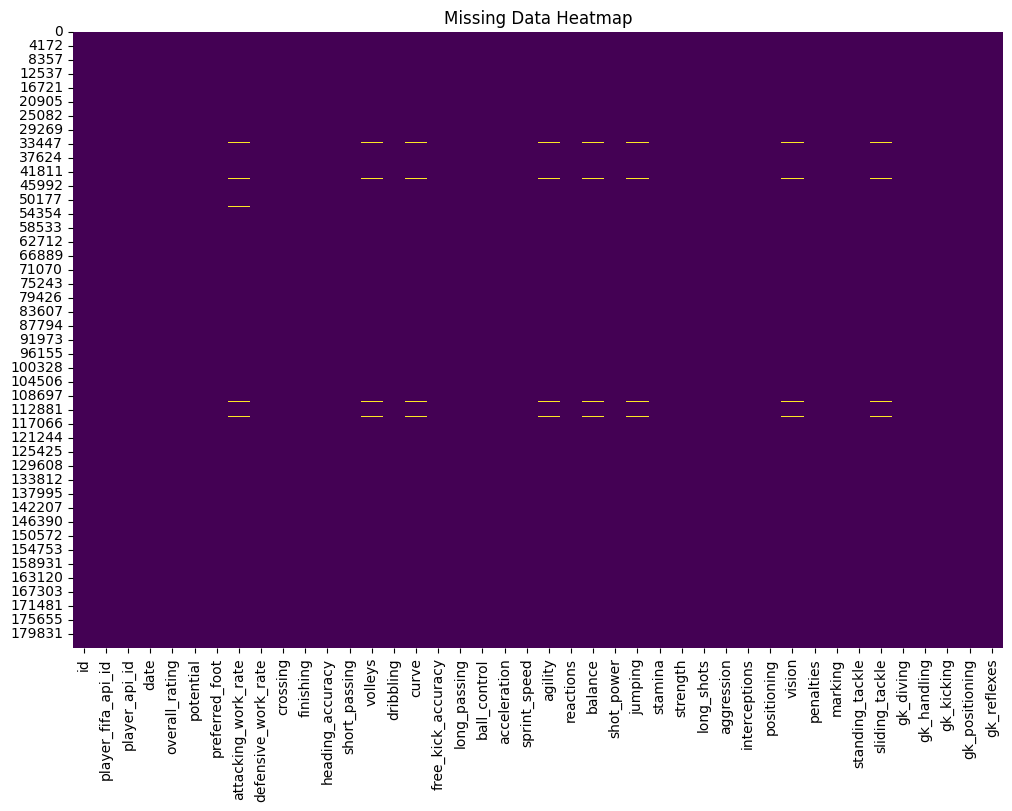

In [128]:
import seaborn as sns

# For missing data in each column, visualize using a count plot
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


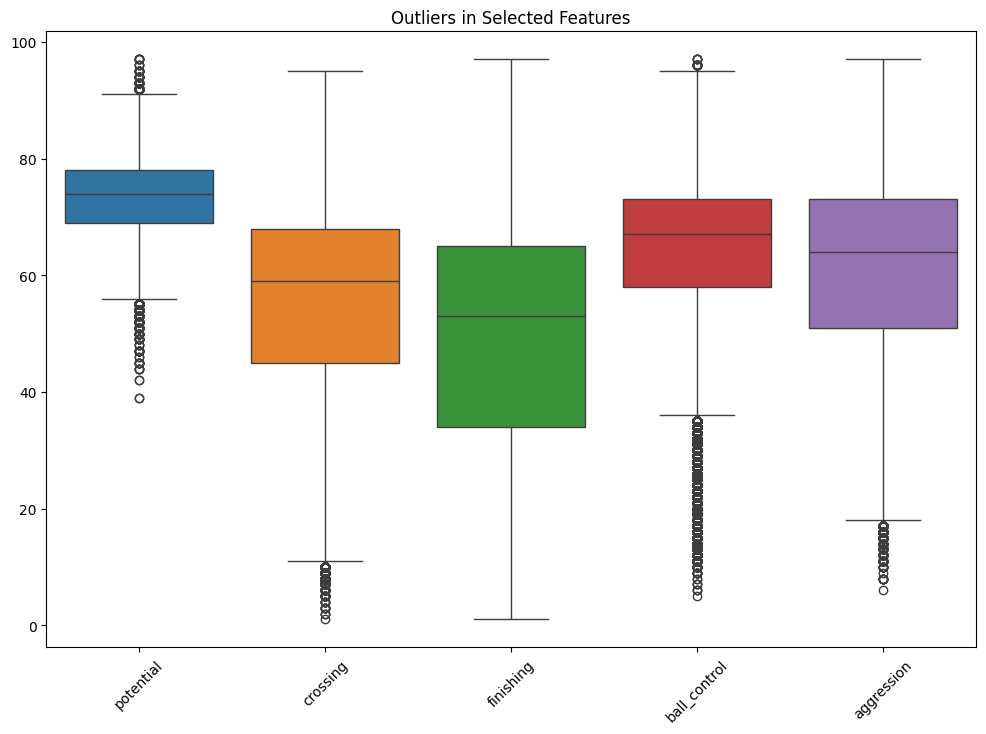

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few features to visualize the outliers
features_to_plot = ['potential', 'crossing', 'finishing', 'ball_control', 'aggression']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features_to_plot])
plt.title('Outliers in Selected Features')
plt.xticks(rotation=45)
plt.show()


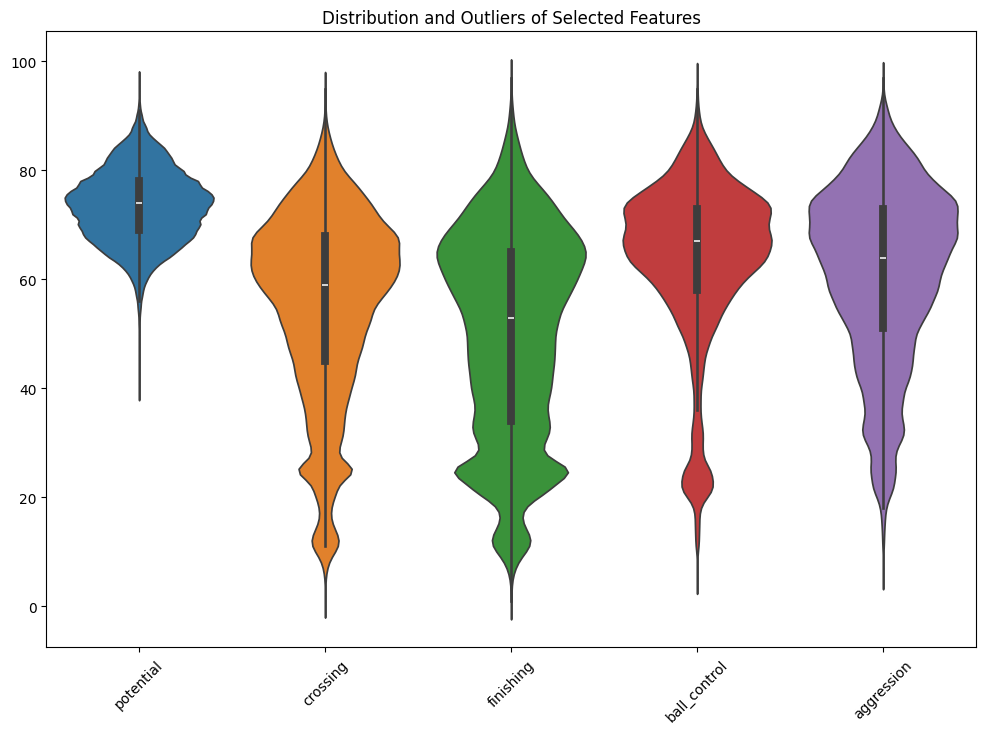

In [130]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[features_to_plot])
plt.title('Distribution and Outliers of Selected Features')
plt.xticks(rotation=45)
plt.show()


In [62]:
df.dropna(thresh=5, inplace=True)

In [63]:
df.shape

(183142, 42)

In [64]:
if 'player_fifa_api_id' in df.columns:
    print("The column 'player_fifa_api_id' exists in the dataset.")
else:
    print("The column 'player_fifa_api_id' does not exist in the dataset.")


The column 'player_fifa_api_id' exists in the dataset.


In [65]:
print(df['player_fifa_api_id'].isna().sum())


0


In [66]:
clean_and_merge_code = """
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class Clean_and_Merge(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        # List of categorical and numerical features
        categorical_attributes = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
        numerical_attributes = ['potential', 'crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
            'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
            'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
            'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
            'gk_positioning', 'gk_reflexes']

        player_ids = df['player_fifa_api_id'].unique()
        new_df = pd.DataFrame()

        for player_id in player_ids:
            index = np.where(df['player_fifa_api_id'] == player_id)[0]

            # Aggregate numerical features by mean
            temp_num = df.iloc[index][numerical_attributes].mean()

            # Aggregate categorical features by mode and handle empty mode result
            temp_cat = df.iloc[index][categorical_attributes].mode()
            if not temp_cat.empty:
                temp_cat = temp_cat.iloc[0]
            else:
                temp_cat = pd.Series([np.nan] * len(categorical_attributes), index=categorical_attributes)

            # Create a new DataFrame for this player's aggregated data
            temp_df = pd.DataFrame(data=[temp_num.values], columns=temp_num.index)
            temp_df[temp_cat.index] = temp_cat.values

            # Use pd.concat instead of append to combine DataFrames
            new_df = pd.concat([new_df, temp_df], ignore_index=True)

        # Data cleaning (replacing unwanted values)
        # Data cleaning (replacing unwanted values)
        to_drop = ['norm', 'y', 'le', 'stoc']
        for col in to_drop:
            new_df['attacking_work_rate'] = new_df['attacking_work_rate'].replace(col, np.nan)

        to_drop = ['ormal', 'ean', 'es', 'tocky', '_0', 'o']
        for col in to_drop:
            new_df['defensive_work_rate'] = new_df['defensive_work_rate'].replace(col, np.nan)

        # Adjust the work rate into categories (using assignment instead of inplace=True)
        low_class = ['0', '1', '2']
        medium_class = ['3', '4', '5', '6']
        high_class = ['7', '8', '9']

        for i in low_class:
            new_df['defensive_work_rate'] = new_df['defensive_work_rate'].replace(i, 'low')

        for i in medium_class:
            new_df['defensive_work_rate'] = new_df['defensive_work_rate'].replace(i, 'medium')

        for i in high_class:
            new_df['defensive_work_rate'] = new_df['defensive_work_rate'].replace(i, 'high')


        # Return the cleaned and merged DataFrame
        return new_df.reset_index(drop=True)


"""

file_path = '/content/clean_and_merge.py'

with open(file_path, 'w') as f:
    f.write(clean_and_merge_code)

print(f"File saved as {file_path}")

File saved as /content/clean_and_merge.py


In [67]:
import sys
import pandas as pd
import importlib

sys.path.append('/content')

if 'clean_and_merge' in sys.modules:
    importlib.reload(sys.modules['clean_and_merge'])

from clean_and_merge import Clean_and_Merge

custom_attribute_object = Clean_and_Merge()

merged_player_data = custom_attribute_object.fit_transform(df)
merged_player_data.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,50.600000,44.600000,38.600000,63.600000,...,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,right,medium,medium
1,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,61.090909,61.878788,62.121212,63.242424,...,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,left,medium,medium
2,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,69.038462,60.192308,55.615385,60.461538,...,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,right,medium,medium
3,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,55.565217,37.782609,40.391304,60.826087,...,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,right,medium,medium
4,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,50.600000,45.480000,26.360000,56.840000,...,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,right,medium,medium


In [68]:
clean_and_merge_target_code = """
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
import pandas as pd

class Clean_and_Merge_Target(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        target_attribute = ['overall_rating']

        df.dropna(thresh=10, inplace=True)
        player_id = df['player_fifa_api_id'].unique()

        new_df = pd.DataFrame()

        for i in player_id:
            index = np.where(df['player_fifa_api_id'] == i)[0]

            temp_num = df.iloc[index][target_attribute].mean()

            temp_df = pd.DataFrame(data=[temp_num], columns=target_attribute)

            # Replace append() with pd.concat()
            new_df = pd.concat([new_df, temp_df], ignore_index=True)

        return new_df.reset_index(drop=True)


"""

file_path_target = '/content/clean_and_merge_target.py'
with open(file_path_target, 'w') as f:
    f.write(clean_and_merge_target_code)

print(f"File saved as {file_path_target}")


File saved as /content/clean_and_merge_target.py


In [69]:
import sys
import pandas as pd
import importlib

sys.path.append('/content')

if 'clean_and_merge_target' in sys.modules:
    importlib.reload(sys.modules['clean_and_merge_target'])

from clean_and_merge_target import Clean_and_Merge_Target

merged_target_object = Clean_and_Merge_Target()

merged_target_data = merged_target_object.fit_transform(df)
merged_target_data.head()


,overall_rating
0,63.600000
1,66.969697
2,67.000000
3,69.086957
4,73.240000


In [70]:
merged_player_data.shape


(11060, 37)

In [71]:
merged_target_data.shape

(11060, 1)

In [72]:
merged_player_data

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,50.600000,44.600000,38.600000,63.600000,...,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,right,medium,medium
1,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,61.090909,61.878788,62.121212,63.242424,...,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,left,medium,medium
2,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,69.038462,60.192308,55.615385,60.461538,...,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,right,medium,medium
3,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,55.565217,37.782609,40.391304,60.826087,...,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,right,medium,medium
4,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,50.600000,45.480000,26.360000,56.840000,...,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,right,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,75.461538,42.000000,27.000000,75.153846,70.000000,30.000000,56.384615,49.000000,35.692308,54.538462,...,76.307692,72.692308,12.846154,12.769231,25.461538,11.384615,13.615385,right,low,medium
11056,71.625000,67.250000,46.750000,60.312500,63.125000,54.562500,61.187500,63.812500,61.750000,62.312500,...,65.250000,63.875000,9.000000,8.000000,5.000000,5.000000,8.000000,left,medium,medium
11057,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,66.857143,60.000000,52.571429,58.285714,...,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286,left,NaN,NaN
11058,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,36.000000,29.000000,41.375000,50.625000,...,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000,right,NaN,NaN


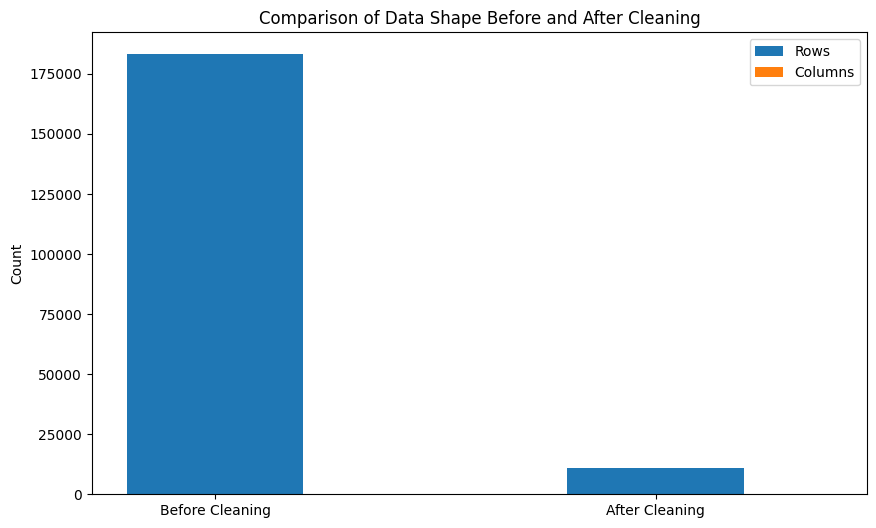

In [131]:
import matplotlib.pyplot as plt

initial_shape = df.shape  # Before cleaning and merging
cleaned_shape = merged_player_data.shape  # After cleaning and merging

# Data for plotting
data = {'Before Cleaning': [initial_shape[0], initial_shape[1]],  # rows, columns
        'After Cleaning': [cleaned_shape[0], cleaned_shape[1]]}

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot for rows and columns
ax.bar(data.keys(), [data['Before Cleaning'][0], data['After Cleaning'][0]], width=0.4, label='Rows', align='center')
ax.bar(data.keys(), [data['Before Cleaning'][1], data['After Cleaning'][1]], width=0.4, label='Columns', align='edge')

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Comparison of Data Shape Before and After Cleaning')
ax.legend()

plt.show()


In [73]:
x_train, x_test, y_train, y_test = train_test_split(merged_player_data,
                                                    merged_target_data,
                                                    test_size=0.2,
                                                    random_state=101)

In [101]:
total_samples = merged_player_data.shape[0]


train_samples = len(x_train)  # Train dataset samples
test_samples = len(x_test)    # Test dataset samples

print(f"Total samples: {total_samples}, Train samples: {train_samples}, Test samples: {test_samples}")


Total samples: 11060, Train samples: 8848, Test samples: 2212


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [75]:
num_pipelne = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_transformer = ColumnTransformer([
    ('num_transformer', num_pipelne, numerical_data),
    ('cat_transformer', cat_pipeline, categorical_data)
])

target_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean', add_indicator=True)),
    ('num_scaler', StandardScaler())
])


In [76]:
full_transformed_data = full_transformer.fit_transform(x_train)
full_transformed_data


array([[ 0.58197118,  0.65919831,  1.21870086, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.75999394,  0.5594177 ,  1.61461829, ...,  0.        ,
         1.        ,  0.        ],
       [-0.58987965, -0.87256068, -1.07515648, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61114926, -0.49402403, -0.94457582, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77446541, -0.15817229, -0.54870336, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.91323318,  0.97212564,  0.74132583, ...,  0.        ,
         1.        ,  0.        ]])

In [77]:
full_transformed_target = target_pipeline.fit_transform(y_train)
full_transformed_target

array([[ 0.81114056],
       [ 1.00651404],
       [-0.11224976],
       ...,
       [ 1.23316027],
       [ 0.31232155],
       [ 0.88329677]])

In [78]:
import joblib
from datetime import datetime

def generate_file_name(filename):
  now = datetime.now()
  current = now.strftime("%d_%m_%y-%H_%M_%S")

  return now.strftime("%d_%m_%y-%H_%M_%S") + '_' + filename

In [79]:
import os
dir_name = 'piepelines'
if not os.path.isdir(dir_name):
  os.makedirs(dir_name)

joblib.dump(custom_attribute_object, os.path.join(dir_name, generate_file_name('custom_attribute_object.pkl')))
joblib.dump(merged_target_object,os.path.join(dir_name, generate_file_name('merged_target_object.pkl')))
joblib.dump(full_transformer, os.path.join(dir_name, generate_file_name('full_transformer.pkl')))
joblib.dump(target_pipeline, os.path.join(dir_name, generate_file_name('target_pipeline.pkl')))

['piepelines/30_12_25-13_04_06_target_pipeline.pkl']

In [80]:
full_transformed_data.shape

(8848, 43)

In [81]:
full_transformed_target.shape

(8848, 1)

###**Machine Learning**

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [83]:
%%time

lin_reg = LinearRegression()

cross_val_score(estimator=lin_reg, X=full_transformed_data,
                             y=full_transformed_target, cv=10, n_jobs=-1)

CPU times: user 42 ms, sys: 10.2 ms, total: 52.2 ms
Wall time: 2.88 s


array([0.86573412, 0.87632987, 0.84636996, 0.86510337, 0.8644227 ,
       0.87188745, 0.86211964, 0.87657222, 0.86725632, 0.86585472])

In [84]:
%%time

tree_reg = DecisionTreeRegressor()

cross_val_score(estimator=tree_reg, X=full_transformed_data,
                             y=full_transformed_target, cv=10, n_jobs=-1)

CPU times: user 28.8 ms, sys: 11 ms, total: 39.9 ms
Wall time: 4.33 s


array([0.8861472 , 0.87549582, 0.8580539 , 0.86203851, 0.86506525,
       0.87425554, 0.87569795, 0.85987188, 0.8747226 , 0.85200015])

In [85]:
%%time

svm_reg = SVR()

cross_val_score(estimator=svm_reg, X=full_transformed_data,
                             y=full_transformed_target, cv=10, n_jobs=-1)



CPU times: user 140 ms, sys: 28.3 ms, total: 168 ms
Wall time: 32.2 s


array([0.97685937, 0.97802457, 0.97273733, 0.97484917, 0.97245267,
       0.97649227, 0.97955977, 0.97637403, 0.97869964, 0.97274002])

In [86]:
%%time

xgb_reg = XGBRegressor()

cross_val_score(estimator=xgb_reg, X=full_transformed_data,
                             y=full_transformed_target, cv=10, n_jobs=-1)


CPU times: user 70.8 ms, sys: 13.4 ms, total: 84.2 ms
Wall time: 11.8 s


array([0.95976153, 0.96061055, 0.95519324, 0.95096974, 0.95135759,
       0.95856757, 0.95952871, 0.96094154, 0.96167394, 0.96303724])

In [87]:
%%time

rf_reg = RandomForestRegressor()

cross_val_score(estimator=rf_reg, X=full_transformed_data,
                             y=full_transformed_target, cv=10, n_jobs=-1)

CPU times: user 889 ms, sys: 224 ms, total: 1.11 s
Wall time: 5min 3s


array([0.95708873, 0.95528415, 0.94097482, 0.94190935, 0.95241481,
       0.94671978, 0.95456591, 0.95404746, 0.95286437, 0.94948052])

In [88]:
test_data = full_transformer.transform(x_test)
test_target = target_pipeline.transform(y_test)
test_data

array([[ 1.0083062 ,  0.72221711,  1.49367349, ...,  0.        ,
         1.        ,  0.        ],
       [-1.2213958 ,  0.13374578,  0.28608535, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.91008926,  1.19957847,  0.04166657, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.96304828, -0.44522506,  0.64641407, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5439789 ,  0.71530132, -1.33539389, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.05674455, -2.33776321, -1.88755753, ...,  0.        ,
         0.        ,  1.        ]])

In [89]:
best_model_details = {}

In [90]:
lin_reg.fit(full_transformed_data, full_transformed_target)

y_pred = lin_reg.predict(test_data)
y_pred = y_pred.reshape(-1,1)

error = sqrt(mean_squared_error(y_pred=y_pred, y_true=test_target))
print('Error : ', error)

best_model_details[lin_reg] = error

Error :  0.35789528478335125


In [91]:
tree_reg.fit(full_transformed_data, full_transformed_target)

y_pred = tree_reg.predict(test_data)
y_pred = y_pred.reshape(-1, 1)

error = sqrt(mean_squared_error(y_pred=y_pred, y_true=test_target))
print('Error : ', error)

best_model_details[tree_reg] = error

Error :  0.3694010763924674


In [92]:
svm_reg.fit(full_transformed_data, full_transformed_target.ravel())

y_pred = svm_reg.predict(test_data)
y_pred = y_pred.reshape(-1,1)

error = sqrt(mean_squared_error(y_pred=y_pred, y_true=test_target))
print('Error : ', error)

best_model_details[svm_reg] = error

Error :  0.14702290899009146


In [93]:
xgb_reg.fit(full_transformed_data, full_transformed_target)

y_pred = xgb_reg.predict(test_data)
y_pred = y_pred.reshape(-1, 1)

error = sqrt(mean_squared_error(y_pred=y_pred, y_true=test_target))
print('Error : ', error)

best_model_details[xgb_reg] = error

Error :  0.19647198305553915


In [94]:
rf_reg.fit(full_transformed_data, full_transformed_target.ravel())

y_pred = rf_reg.predict(test_data)
y_pred = y_pred.reshape(-1, 1)

error = sqrt(mean_squared_error(y_pred=y_pred, y_true=test_target))
print('Error : ', error)

best_model_details[rf_reg] = error

Error :  0.21180619583426732


In [95]:
best_model_details

{LinearRegression(): 0.35789528478335125,
 DecisionTreeRegressor(): 0.3694010763924674,
 SVR(): 0.14702290899009146,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...): 0.19647198305553915,
 RandomForestRegressor(): 0.21180619583426732}

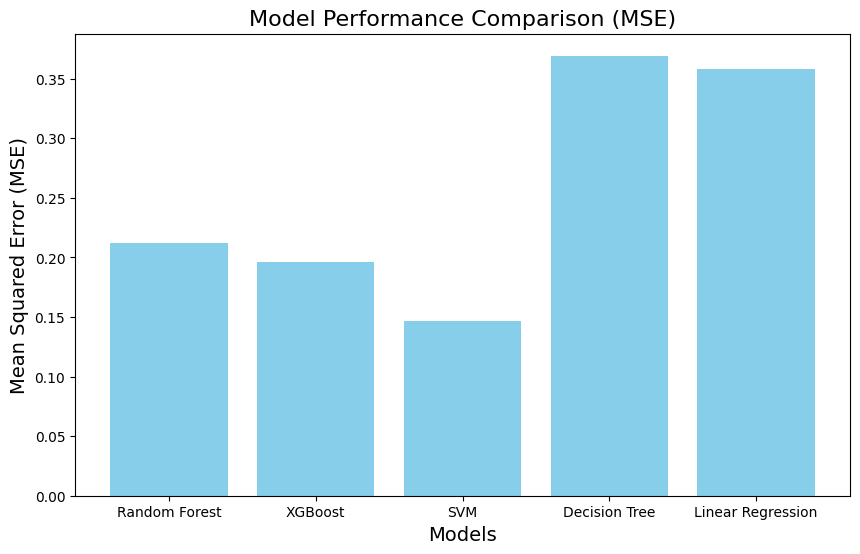

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

model_names = ['Random Forest', 'XGBoost', 'SVM', 'Decision Tree', 'Linear Regression']
mse_values = [
    best_model_details[rf_reg],
    best_model_details[xgb_reg],
    best_model_details[svm_reg],
    best_model_details[tree_reg],
    best_model_details[lin_reg]
]

# Plotting the model comparison
plt.figure(figsize=(10, 6))

# Create the bar chart for MSE comparison
plt.bar(model_names, mse_values, color='skyblue')

# Adding the title and labels
plt.title('Model Performance Comparison (MSE)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)

# Display the chart
plt.show()


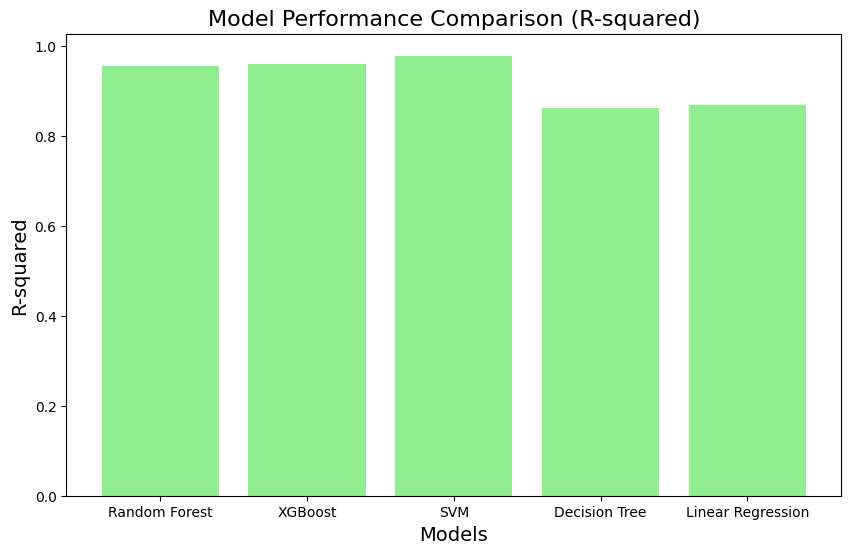

In [119]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_values = [
    r2_score(test_target, rf_reg.predict(test_data)),
    r2_score(test_target, xgb_reg.predict(test_data)),
    r2_score(test_target, svm_reg.predict(test_data)),
    r2_score(test_target, tree_reg.predict(test_data)),
    r2_score(test_target, lin_reg.predict(test_data))
]

# Plotting the R-squared comparison
plt.figure(figsize=(10, 6))

# Create the bar chart for R-squared comparison
plt.bar(model_names, r2_values, color='lightgreen')

# Adding the title and labels
plt.title('Model Performance Comparison (R-squared)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-squared', fontsize=14)

# Display the chart
plt.show()


In [96]:
from prompt_toolkit import key_binding
min_value = list(best_model_details.values())[0]
my_model = ''

for key, value in best_model_details.items():
  if value < min_value:
    min_value = value
    my_model = key

print('Best performing  model : {} \nError : {}'.format(my_model, min_value))

Best performing  model : SVR() 
Error : 0.14702290899009146


In [97]:
der_name ='models'

if not os.path.isdir(dir_name):
  os.makedirs(dir_name)

joblib.dump(my_model, os.path.join(dir_name, generate_file_name('best_model.pkl')))

['piepelines/30_12_25-13_10_52_best_model.pkl']

In [117]:
from nbconvert import HTMLExporter

# Set the correct path for the notebook file
notebook_path = '/content/Player_Rating_Prediction_Model.ipynb'

# Convert the notebook to an HTML file
exporter = HTMLExporter()
exporter.exclude_input = False  # Set to False if you want to include input cells in the report
output, resources = exporter.from_filename(notebook_path)

# Save the HTML report
html_output_path = "/content/Player_Rating_Prediction_Report.html"
with open(html_output_path, "w") as f:
    f.write(output)

# Provide a download link
from google.colab import files
files.download(html_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>